# Load and display COVID-19 data

We will use COVID-19 data from selected countries with relatively simple patterns of outbreak. Data used in this notebook were downloaded from https://ourworldindata.org/ and pre-processed.


Most python programs start with a descriptive comment block and then **import** code that someone else has already written. A single file of code is called a *module* and a folder of modules is called a *package*. We will use the numerical python package **numpy** and plotting  module **pyplot** from the **matplotlib** maths plotting library package.

There are several ways to import, but for example...

**import** numpy **as** np

allows you to refer to any function() in numpy as `np.function()`

In [1]:
""" 
    This first comment block, which normally contains a general description of the code.
    Learn to use python and load and display data.
"""

# Tell the notebook what mode to display matplotlib graphics in (best options are: inline or notebook)
%matplotlib inline

# This is the first code cell, so import useful packages/modules.
import numpy as np
import matplotlib.pyplot as plt

'''
    The dataDir string identifies where our data are. 
    The . refers to the current directory - probably where this notebook is.
    The '/' character is the linux style, but best to use 
        because '\' has special meaning in python strings.
    '..' refers to the parent directory, and '.' to the current directory
'''
dataDir = '../DATA/covid/'

## Lists and tuples

A **list** (type) is identified with square \[brackets\] and is an arbitrary collection of objects. 

A **tuple** is very similar to a list, but is identified with round (brackets).

The difference between a list and a tuple is that a list is mutable, i.e. it can be modified. In some cases you want to be sure that a piece of code cannot accidentally modify a set of objects that you identify or input, so a tuple is useful.

We *instantiate* (create) the *list* object called `countryList` below using `=` to assign it.

In [2]:
countryList = ['NZL','AUS','FRA','ITA','ESP','GBR']

We can *iterate* though each item in a list using  

**for** item **in** list:

    and then indentation tells the code which lines are
    
    within the loop and can do something with the item
    
and following lines outside the loop are indented the same as the `for item in list` statement.

## Display COVID-19 data

It is easy to find more detailed help and examples for np.loadtxt() and plt.plot() on the internet. The usage is self-evident.

Working on NZL
Working on AUS
Working on FRA
Working on ITA
Working on ESP
Working on GBR


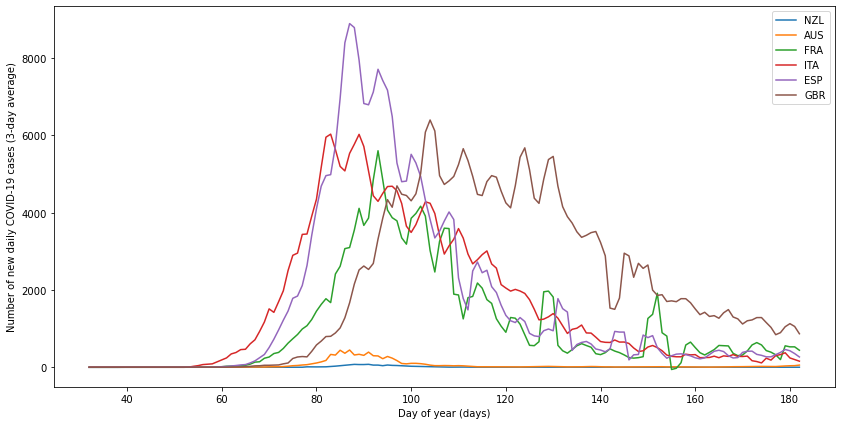

In [3]:
plt.figure(figsize=[14,7])
plt.xlabel('Day of year (days)')
plt.ylabel('Number of new daily COVID-19 cases (3-day average)')

# Loop through each item in the list
for name in countryList:
    
    print("Working on",name)
    
    # String called filename created by adding other strings together (concatenation)
    filename = dataDir + 'covid19_dailyCases_3dayAv_' + name + '.csv'   
    
    # Load day from column 0 from a file using function np.loadtxt and force integer values
    day = np.loadtxt(filename, delimiter=',', usecols=(0), skiprows=1, dtype=int)
    
    # Load the number of new daily cases from column 1 - use default float values
    newCases = np.loadtxt(filename, delimiter=',', usecols=(1), skiprows=1)
    
    plt.plot(day,newCases,label=name)

plt.legend()
plt.show()

## Arrays of data

The numpy loadtxt function created array objects `day` and `newCases` (which in this case are 1-d vectors), which we can interrogate and manipulate.

Let's take a look at the object called `day`...


In [4]:
print('day')
print('type(day) =',type(day))
print('type(first element/value of day) =',type(day[0]))
print(day)

day
type(day) = <class 'numpy.ndarray'>
type(first element/value of day) = <class 'numpy.int32'>
[ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182]


They type of object that `day` is is defined by the class `numpy.ndarray`. The type of the first element is defined by the class `numpy.int32`, which is the numpy definition of a 32-bit (i.e. 32 ones and zeros) integer. 

Both objects (`day` and `newCases`) are 'numpy arrays', so each has (1) its own data with its own type, and (2) some functions in common that can be used to help interogate and manipulate it. Let's demonstrate this by normalizing the amplitude of the peak to 1 and shifting the position of the first peak to be at day=0.

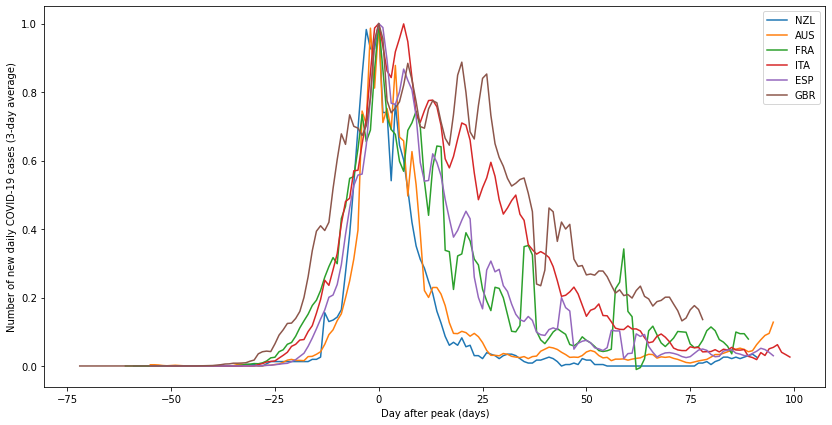

In [5]:
plt.figure(figsize=[14,7])
plt.xlabel('Day after peak (days)')
plt.ylabel('Number of new daily COVID-19 cases (3-day average)')

for name in countryList:
    
    filename = dataDir + 'covid19_dailyCases_3dayAv_' + name + '.csv'   
    
    newCases = np.loadtxt(filename, delimiter=',', usecols=(1), skiprows=1)
    newCasesNormalized = newCases / newCases.max()
    
    day = np.loadtxt(filename, delimiter=',', usecols=(0), skiprows=1, dtype=int)
    # Don't worry about exactly how this next line works, but you can see the point
    dayShifted = day - day[np.where(newCases == newCases.max())[0][0]]
    
    plt.plot(dayShifted,newCasesNormalized,label=name)

plt.legend()
plt.show()